In [4]:
#!pip install jsonlines

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json


In [10]:
with open("filtered_stories.json", "r") as f:
    data = json.load(f)


stories = pd.DataFrame(data)
stories["num_words"] = stories["story"].str.split().str.len()

In [11]:
len(stories)

100

In [14]:
ratings = stories["av_rating"].astype(float).tolist()
num_ratings = stories["num_ratings"].astype(int).tolist()
num_words = stories["num_words"].astype(int).tolist()

In [15]:
len(ratings)

100

Descriptive Statistics:
Mean: 3.52
Standard Deviation: 0.43
Min: 2.57
Max: 4.39
25th Percentile: 3.22
75th Percentile: 3.86


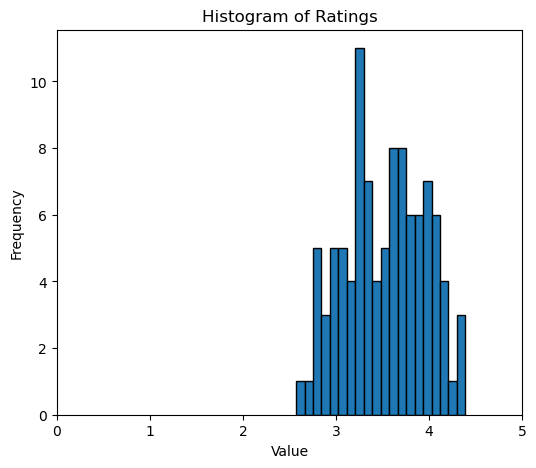

In [42]:

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, figsize=(6, 5))

# Plot the histogram
axes.hist(ratings, bins=20, edgecolor='black')
axes.set_title('Histogram of Ratings')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_xlim(0, 5)

# # Plot the box plot
# axes[1].boxplot(ratings)
# axes[1].set_title('Box Plot of Ratings')
# axes[1].set_ylabel('Value')
# axes[1].set_xticks([])

# Add data information (descriptive statistics)
mean_val = np.mean(ratings)
std_dev_val = np.std(ratings)
min_val = np.min(ratings)
max_val = np.max(ratings)
percentile_25 = np.percentile(ratings, 25)
percentile_75 = np.percentile(ratings, 75)

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Standard Deviation: {std_dev_val:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"25th Percentile: {percentile_25:.2f}\n"
    f"75th Percentile: {percentile_75:.2f}"
)

# Print the descriptive statistics to the console
print("Descriptive Statistics:")
print(stats_text)

Descriptive Statistics:
Mean: 1276.49
Standard Deviation: 469.50
Min: 283.00
Max: 1988.00
25th Percentile: 961.75
75th Percentile: 1654.75


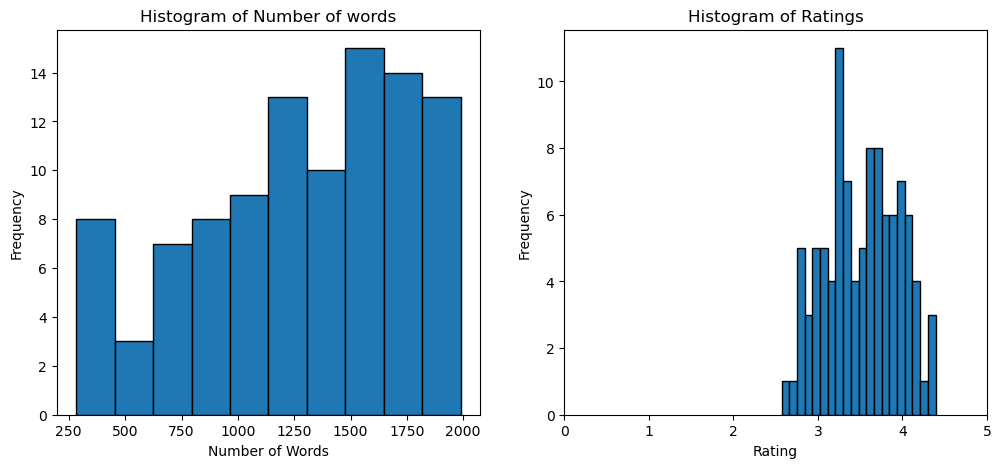

In [50]:

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
axes[0].hist(num_words, bins=10, edgecolor='black')
axes[0].set_title('Histogram of Number of words')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

# Plot the box plot
axes[1].hist(ratings, bins=20, edgecolor='black')
axes[1].set_title('Histogram of Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 5)

# Add data information (descriptive statistics)
mean_val = np.mean(num_words)
std_dev_val = np.std(num_words)
min_val = np.min(num_words)
max_val = np.max(num_words)
percentile_25 = np.percentile(num_words, 25)
percentile_75 = np.percentile(num_words, 75)

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Standard Deviation: {std_dev_val:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"25th Percentile: {percentile_25:.2f}\n"
    f"75th Percentile: {percentile_75:.2f}"
)

# Print the descriptive statistics to the console
print("Descriptive Statistics:")
print(stats_text)

In [27]:
# Assumed global human std for individual ratings
sigma = 1.2

# Compute expected variance of the average rating per story
stories["var_of_mean"] = sigma**2 / stories["num_ratings"]

# Expected RMSE per story (std of mean)
stories["expected_rmse"] = np.sqrt(stories["var_of_mean"])

# Overall dataset expected RMSE (weighted by number of ratings)
total_ratings = stories["num_ratings"].sum()

weighted_mse = (stories["expected_rmse"]**2 * stories["num_ratings"]).sum() / total_ratings
expected_rmse_overall = np.sqrt(weighted_mse)

#print(stories[["story","num_ratings","expected_rmse"]])
print("\nExpected RMSE for entire dataset:", expected_rmse_overall)


Expected RMSE for entire dataset: 0.021052372394671552


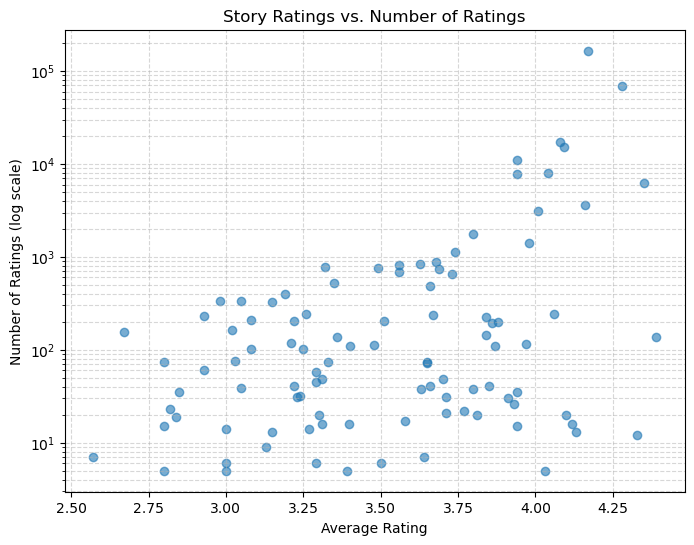

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(ratings, num_ratings, alpha=0.6)

# Set log scale for y-axis
plt.yscale('log')

plt.title("Story Ratings vs. Number of Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Ratings (log scale)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

Mean: 1563.81
Standard Deviation: 352.70
Min: 831.00
Max: 2455.00
25th Percentile: 1344.00
75th Percentile: 1651.25


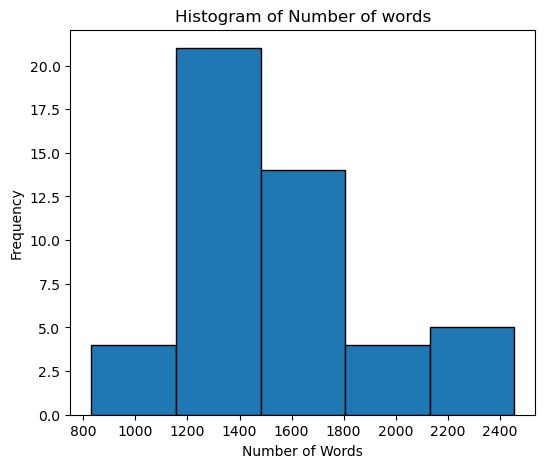

In [157]:
with open("NewYorkerStories.json", "r") as f:
    data = json.load(f)


ny = pd.DataFrame(data)
ny["num_words"] = ny["content"].str.split().str.len()
ny_num_words = ny["num_words"].astype(int).tolist()

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, figsize=(6, 5))

# Plot the histogram
axes.hist(ny_num_words, bins=5, edgecolor='black')
axes.set_title('Histogram of Number of words')
axes.set_xlabel('Number of Words')
axes.set_ylabel('Frequency')

# Add data information (descriptive statistics)
mean_val = np.mean(ny_num_words)
std_dev_val = np.std(ny_num_words)
min_val = np.min(ny_num_words)
max_val = np.max(ny_num_words)
percentile_25 = np.percentile(ny_num_words, 25)
percentile_75 = np.percentile(ny_num_words, 75)

stats_text = (
    f"Mean: {mean_val:.2f}\n"
    f"Standard Deviation: {std_dev_val:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"25th Percentile: {percentile_25:.2f}\n"
    f"75th Percentile: {percentile_75:.2f}"
)
print(stats_text)

In [114]:
dimensions = pd.read_csv("chakr_results.csv")
total = dimensions['Total'].tolist()

Text(0, 0.5, 'Frequency')

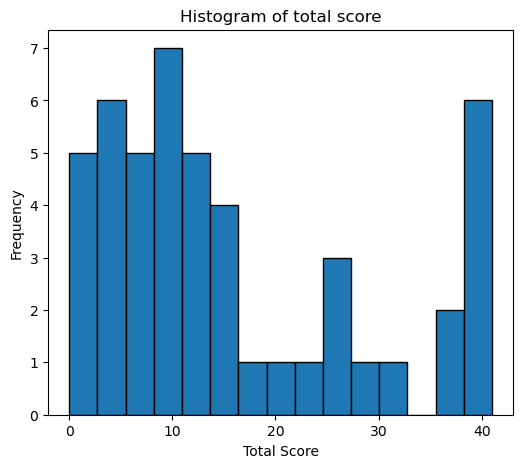

In [113]:

fig, axes = plt.subplots(1, figsize=(6, 5))

# Plot the histogram
axes.hist(total, bins=15, edgecolor='black')
axes.set_title('Histogram of total score')
axes.set_xlabel('Total Score')
axes.set_ylabel('Frequency')


In [100]:
dimensions.describe()

,Narrative Ending,Understandability and Coherence,Scene vs Summary,Narrative Pacing,Language Proficiency and Literary Devices,Emotional Flexibility,Structural Flexibility,Perspective and Voice Flexibility,Originality in Thought,Originality in Form and Structure,Originality in Theme and Content,Rhetorical Complexity,World Building and Setting,Character Development,Total
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.250000,1.550000,1.500000,2.000000,1.300000,1.500000,1.250000,0.800000,1.300000,0.700000,0.900000,0.950000,1.750000,0.950000,17.700000
std,1.251315,1.050063,1.192079,1.076055,1.128576,1.192079,1.251315,1.105013,1.031095,1.080935,1.252366,1.234376,1.164158,1.050063,13.381448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.750000,1.750000,0.750000,0.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.750000
50%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,13.500000
75%,2.250000,2.000000,3.000000,3.000000,2.250000,3.000000,2.250000,1.000000,2.000000,1.250000,2.000000,2.000000,3.000000,1.000000,25.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,41.000000


array([[<Axes: title={'center': 'Narrative Ending'}>,
        <Axes: title={'center': 'Understandability and Coherence'}>,
        <Axes: title={'center': 'Scene vs Summary'}>,
        <Axes: title={'center': 'Narrative Pacing'}>],
       [<Axes: title={'center': 'Language Proficiency and Literary Devices'}>,
        <Axes: title={'center': 'Emotional Flexibility'}>,
        <Axes: title={'center': 'Structural Flexibility'}>,
        <Axes: title={'center': 'Perspective and Voice Flexibility'}>],
       [<Axes: title={'center': 'Originality in Thought'}>,
        <Axes: title={'center': 'Originality in Form and Structure'}>,
        <Axes: title={'center': 'Originality in Theme and Content'}>,
        <Axes: title={'center': 'Rhetorical Complexity'}>],
       [<Axes: title={'center': 'World Building and Setting'}>,
        <Axes: title={'center': 'Character Development'}>, <Axes: >,
        <Axes: >]], dtype=object)

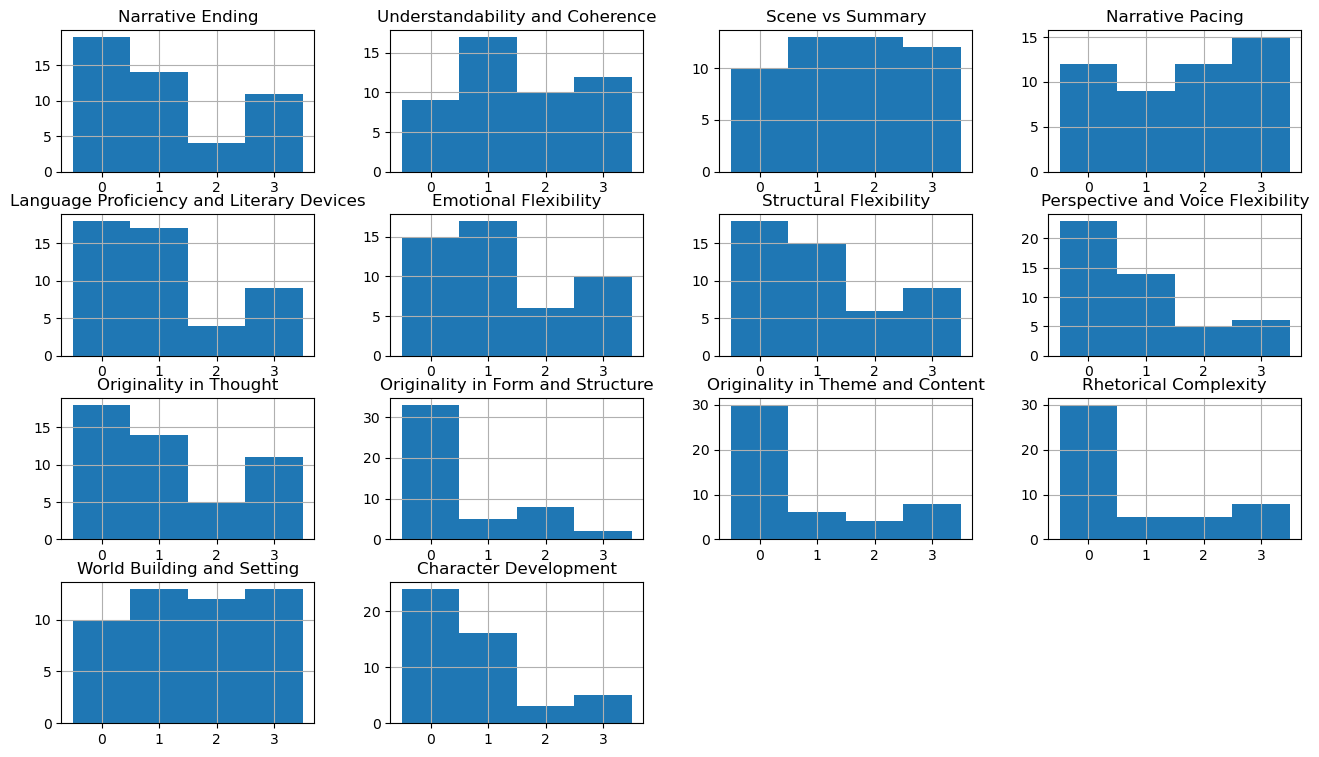

In [140]:
dimensions.drop("Total",axis=1).hist(bins=[-0.5,0.5,1.5,2.5,3.5], figsize=(16,9))

<Axes: >

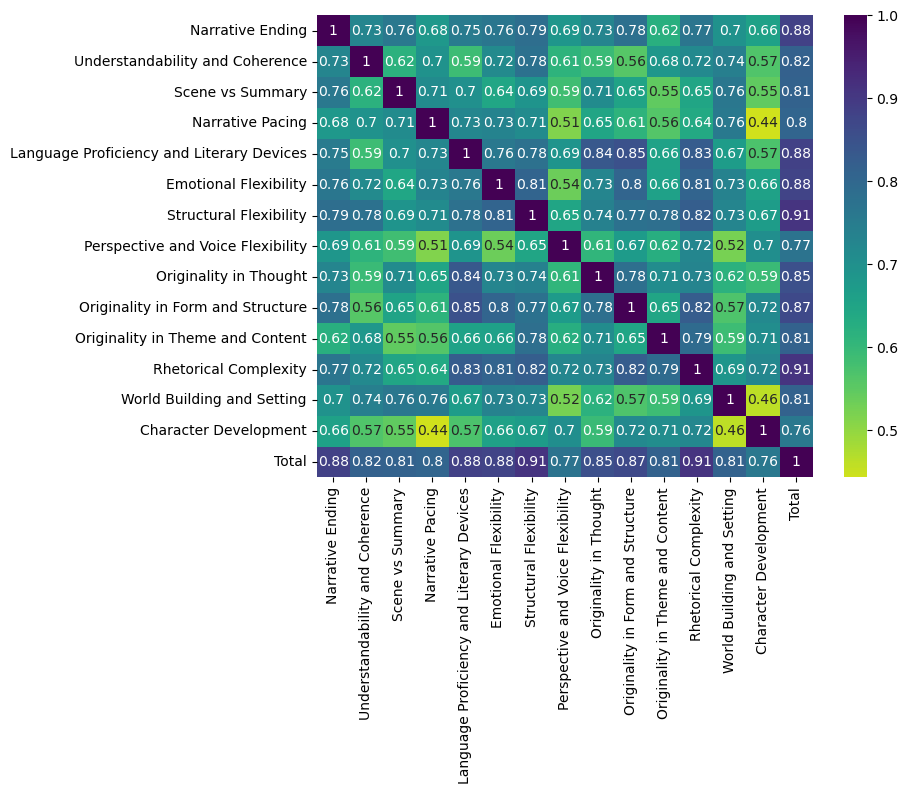

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(dimensions.corr(), annot=True, cmap="viridis_r", center=0.7)


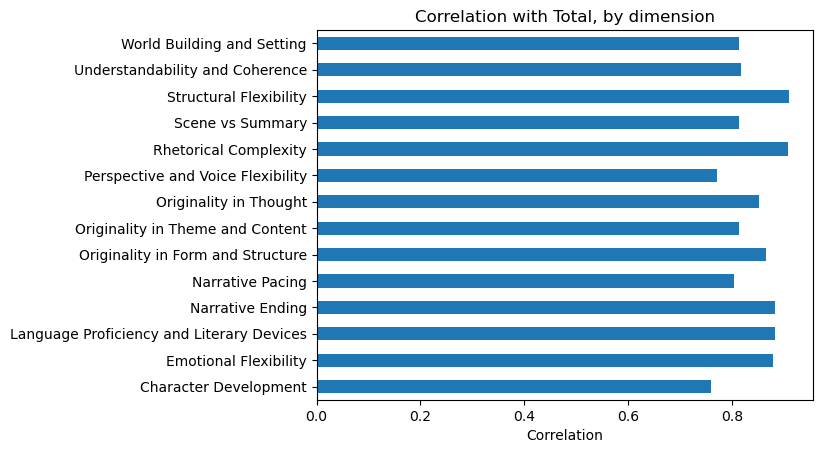

In [152]:
dimensions.corr()['Total'].drop('Total').sort_index().plot(kind='barh')
plt.title("Correlation with Total, by dimension")
plt.xlabel('Correlation')
plt.show()


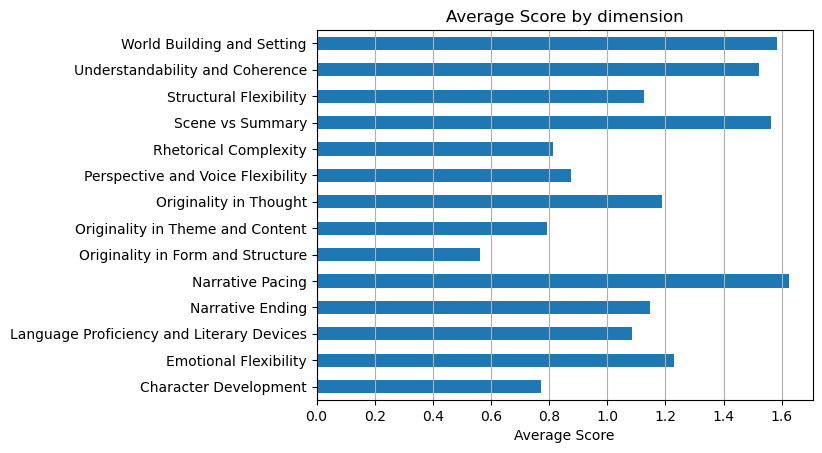

In [156]:
dimensions.mean().drop("Total").sort_index().plot(kind="barh")
plt.title("Average Score by dimension")
plt.grid(True,axis='x')
plt.xlabel('Average Score')
plt.show()


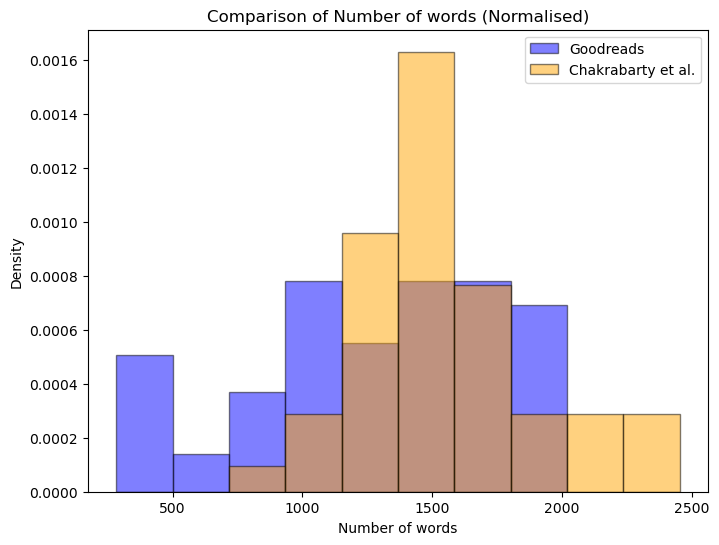

In [87]:
all_data = np.concatenate([num_words, ny_num_words])
bins = np.histogram_bin_edges(all_data, bins=10)  # or choose your number of bins

plt.figure(figsize=(8,6))
plt.hist(num_words, bins=bins, alpha=0.5, label='Goodreads', color='blue', density=True, edgecolor = 'black')
plt.hist(ny_num_words, bins=bins, alpha=0.5, label='Chakrabarty et al.', color='orange', density=True, edgecolor = 'black')

plt.title("Comparison of Number of words (Normalised)")
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.legend()
plt.show()